In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
from plot import *

In [17]:
def append_mean_std(inp_data_array, inp_mean_array, inp_std_array):
    inp_mean_array = np.append(inp_mean_array, np.mean(inp_data_array))
    inp_std_array = np.append(inp_std_array, np.std(inp_data_array))
    return inp_mean_array, inp_std_array

In [30]:
def get_model2bin_weekly_dose2metric2statistic2array(model2bin_weekly_dose2data, ix = 2300):
    model2bin_weekly_dose2metric2statistic2array = {}
    for model, bin_weekly_dose2data in model2bin_weekly_dose2data.items():
        print("model: " + str(model))
        bin_weekly_dose_vals = [str(i) for i in np.sort(np.array([int(k) for k in bin_weekly_dose2data.keys()]))]

        for bin_weekly_dose_val in bin_weekly_dose_vals:
            # Initialize arrays
            mean_end_frac_incorrect = np.array([])
            std_end_frac_incorrect = np.array([])
            mean_end_regret_expected = np.array([])
            std_end_regret_expected = np.array([])
            mean_end_regret_observed = np.array([])
            std_end_regret_observed = np.array([])

            # Load data
            data = bin_weekly_dose2data[bin_weekly_dose_val]
            all_a_star_a_hat, all_frac_incorrect, all_frac_correct, all_regret_expected, all_regret_observed = data

            # Get the appropriate metrics
            end_frac_incorrect = all_frac_incorrect[:, ix]
            end_regret_expected = all_regret_expected[:, ix]
            end_regret_observed = all_regret_observed[:, ix]

            # Update mean and standard deviations
            mean_end_frac_incorrect, std_end_frac_incorrect = append_mean_std(end_frac_incorrect, mean_end_frac_incorrect, std_end_frac_incorrect)
            mean_end_regret_expected, std_end_regret_expected = append_mean_std(end_regret_expected, mean_end_regret_expected, std_end_regret_expected)
            mean_end_regret_observed, std_end_regret_observed = append_mean_std(end_regret_observed, mean_end_regret_observed, std_end_regret_observed)

            metric2statistic2array = {"end_frac_incorrect": {"mean": mean_end_frac_incorrect, "std": std_end_frac_incorrect}, "end_regret_expected": {"mean": mean_end_regret_expected, "std": std_end_regret_expected}, "end_regret_observed": {"mean": mean_end_regret_observed, "std": std_end_regret_observed}}
            if model in model2bin_weekly_dose2metric2statistic2array:
                model2bin_weekly_dose2metric2statistic2array[model][bin_weekly_dose_val] = metric2statistic2array
            else:
                model2bin_weekly_dose2metric2statistic2array[model] = {bin_weekly_dose_val: metric2statistic2array}
    return model2bin_weekly_dose2metric2statistic2array

In [31]:
model2bin_weekly_dose2data = get_model2bin_weekly_dose2data("data/buckets/")

In [32]:
model2bin_weekly_dose2metric2statistic2array = get_model2bin_weekly_dose2metric2statistic2array(model2bin_weekly_dose2data, ix = 2300)

model: UCBDNet
model: eGreedy
model: UCBNet
model: eGreedyD
model: ThompsonNet
model: wpda
model: wcda
model: fixed_dose
model: ThompsonDNet


In [35]:
bin_weekly_dose2metric2statistic2array

{'1': {'end_frac_incorrect': {'mean': array([ 17.69932563]),
   'std': array([ 0.38275245])},
  'end_regret_expected': {'mean': array([ 40726.14826441]),
   'std': array([ 880.71338876])},
  'end_regret_observed': {'mean': array([ 40726.14826441]),
   'std': array([ 880.71338876])}},
 '2': {'end_frac_incorrect': {'mean': array([ 0.22947994]),
   'std': array([ 0.00458352])},
  'end_regret_expected': {'mean': array([ 494.76557925]),
   'std': array([ 13.91187915])},
  'end_regret_observed': {'mean': array([ 528.03333333]),
   'std': array([ 10.54666877])}},
 '3': {'end_frac_incorrect': {'mean': array([ 0.31906417]),
   'std': array([ 0.00784044])},
  'end_regret_expected': {'mean': array([ 226.80832814]),
   'std': array([ 14.82214026])},
  'end_regret_observed': {'mean': array([ 734.16666667]),
   'std': array([ 18.04084871])}},
 '4': {'end_frac_incorrect': {'mean': array([ 0.48984499]),
   'std': array([ 0.00742527])},
  'end_regret_expected': {'mean': array([ 437.21837726]),
   'std'

In [42]:
def create_y_yerr(bin_weekly_dose2metric2statistic2array, metric):
    y = np.array([])
    y_err = np.array([])
    for x_ in x:
        y = np.append(y, bin_weekly_dose2metric2statistic2array[str(x_)][metric]["mean"])
        y_err = np.append(y_err, bin_weekly_dose2metric2statistic2array[str(x_)][metric]["std"])
    return y, y_err

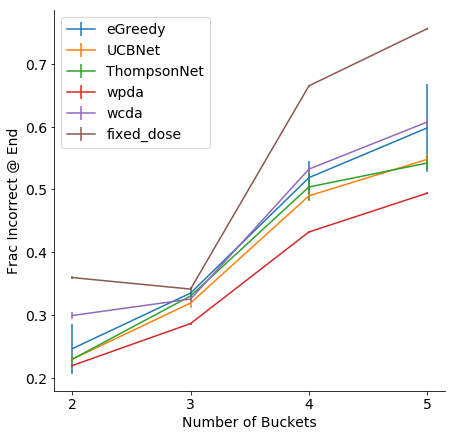

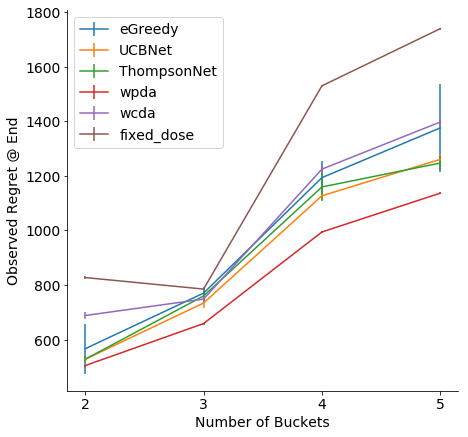

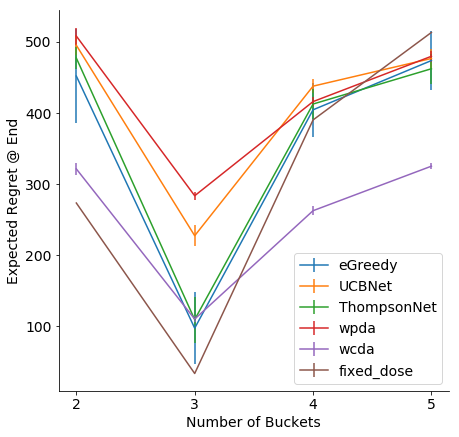

In [64]:
%matplotlib inline

fontsize = 14
for metric in ["end_frac_incorrect", "end_regret_observed", "end_regret_expected"]:
    fig = plt.figure(figsize=(7, 7))
    names = []
    for model, bin_weekly_dose2metric2statistic2array in model2bin_weekly_dose2metric2statistic2array.items():
        if not(model in ["UCBDNet", "eGreedyD", "ThompsonDNet"]):
            x = np.sort([int(i) for i in bin_weekly_dose2metric2statistic2array.keys() if not(i == "1")])
            y, y_err = create_y_yerr(bin_weekly_dose2metric2statistic2array, metric)
            names.append(model)

            plt.errorbar(x, y, y_err)

    # Title, Axes, Tick Marks, Legend
    plt.xlabel("Number of Buckets", fontsize = fontsize)
    y_label_mapping = {"end_frac_incorrect": "Frac Incorrect @ End", "end_regret_observed": "Observed Regret @ End", "end_regret_expected": "Expected Regret @ End"}
    plt.ylabel(y_label_mapping[metric], fontsize = fontsize)
    plt.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)
    plt.legend(names, fontsize = fontsize)

    # Despine, Add Minor Tick Marks
    ax = plt.gca()
    sns.despine(right = True, top = True)
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
#     ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))    
    plt.show()